In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.graphics.gofplots import qqplot



# read data
# df = pd.read_csv('filtered_data.csv')

In [36]:
list_variable = ['Max Lactate', 'Min Lactate',
                 'Mean Lactate', 'Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
                 'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
                 'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
                 'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
                 'Mean Hemoglobin', 'Ventilation Duration (h)']


# Get data type, mode, count of mode (percentage of mode of total), missing value, percentage of missing value

def data_info(df):
    data_info = pd.DataFrame(columns=['Variable', 'Description'])
    for i in list_variable:
        description = f'Data type: Numerical - continous, Mode: {df[i].mode()[0]}, Frequency of Mode: {df[i].value_counts().max()} ({df[i].value_counts().max()/df[i].count():.2%}), Missing Values: {df[i].isnull().sum()} ({df[i].isnull().sum()/df[i].count():.2%})'
        data_info.loc[len(data_info)] = [i, description]
    #export to csv
    data_info.to_csv('data_info.csv', index=False)
    return data_info


data_info(df)

,Variable,Description
0,Max Lactate,"Data type: Numerical - continous, Mode: 1.8, F..."
1,Min Lactate,"Data type: Numerical - continous, Mode: 1.0, F..."
2,Mean Lactate,"Data type: Numerical - continous, Mode: 1.4, F..."
3,Max pH,"Data type: Numerical - continous, Mode: 7.44, ..."
4,Min pH,"Data type: Numerical - continous, Mode: 7.32, ..."
5,Mean pH,"Data type: Numerical - continous, Mode: 7.38, ..."
6,Max Glucose,"Data type: Numerical - continous, Mode: 165.0,..."
7,Min Glucose,"Data type: Numerical - continous, Mode: 99.0, ..."
8,Mean Glucose,"Data type: Numerical - continous, Mode: 130.0,..."
9,Max WBC,"Data type: Numerical - continous, Mode: 12.3, ..."


In [31]:
# Get statistics of the data
def data_statistics(df):
    data_statistics = pd.DataFrame(columns=['Variable', 'Description'])
    for i in list_variable:
        description = f'Mean: {df[i].mean():.2f}, Std: {df[i].std():.2f}, Min: {df[i].min():.2f}, Median: {df[i].median():.2f}, Max: {df[i].max():.2f}, Shape: '
        data_statistics.loc[len(data_statistics)] = [i, description]
    #export to csv
    data_statistics.to_csv('data_statistics.csv', index=False)
    return data_statistics

data_statistics(df)

,Variable,Description
0,Max Lactate,"Mean: 3.41, Std: 2.87, Min: 0.40, Median: 2.50..."
1,Min Lactate,"Mean: 1.83, Std: 1.46, Min: 0.20, Median: 1.40..."
2,Mean Lactate,"Mean: 2.57, Std: 1.95, Min: 0.38, Median: 2.00..."
3,Max pH,"Mean: 7.44, Std: 0.07, Min: 6.72, Median: 7.44..."
4,Min pH,"Mean: 7.30, Std: 0.10, Min: 6.37, Median: 7.31..."
5,Mean pH,"Mean: 7.37, Std: 0.07, Min: 6.72, Median: 7.38..."
6,Max Glucose,"Mean: 189.33, Std: 86.83, Min: 38.00, Median: ..."
7,Min Glucose,"Mean: 109.18, Std: 37.48, Min: 1.15, Median: 1..."
8,Mean Glucose,"Mean: 145.98, Std: 46.27, Min: 21.33, Median: ..."
9,Max WBC,"Mean: 15.06, Std: 10.26, Min: 0.10, Median: 13..."


In [38]:
# draw histogram with the median line
def draw_histogram(df):
    for i in list_variable:
        plt.figure()
        sns.histplot(df[i], kde=True)
        plt.axvline(df[i].median(), color='r', linestyle='dashed', linewidth=2)
        plt.axvline(df[i].mean(), color='b', linestyle='dashed', linewidth=2)
        plt.axvline(df[i].mode()[0], color='g', linestyle='dashed', linewidth=2)
        plt.title(i)
        plt.savefig(f'histogram_{i}.png')
        plt.close()

draw_histogram(df)

## Correlation Matrix to check the relevant between variables


In [45]:
# Convert M, F from gender to 0, 1
df['Gender'].replace({'F': 0, 'M': 1}, inplace=True)

In [46]:
df.head()

,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,Metastasis,...,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin,Ventilation Duration (h),RRT
0,0,77,1,0,0,0,0,0,0,0,...,41.0,44.75,3.2,2.4,2.65,12.8,7.8,10.04,83.733333,0
1,1,42,1,1,0,0,0,0,0,0,...,16.0,16.50,1.4,1.2,1.30,15.4,12.9,14.10,118.333333,0
2,1,72,1,1,0,0,0,0,0,0,...,28.0,33.50,1.7,1.3,1.50,13.3,7.8,10.23,82.666667,0
3,0,40,0,1,0,1,0,0,0,0,...,13.0,15.33,0.8,0.5,0.63,12.3,7.9,10.88,6.816667,0
4,0,47,0,0,0,0,0,0,0,0,...,10.0,10.50,0.8,0.7,0.75,13.7,9.1,10.77,0.833333,0


In [51]:
# Correlation matrix
# heatmap = sns.heatmap(df.corr(), annot=True)

#export to csv
correlation = df.corr()
correlation.to_csv('correlation.csv')

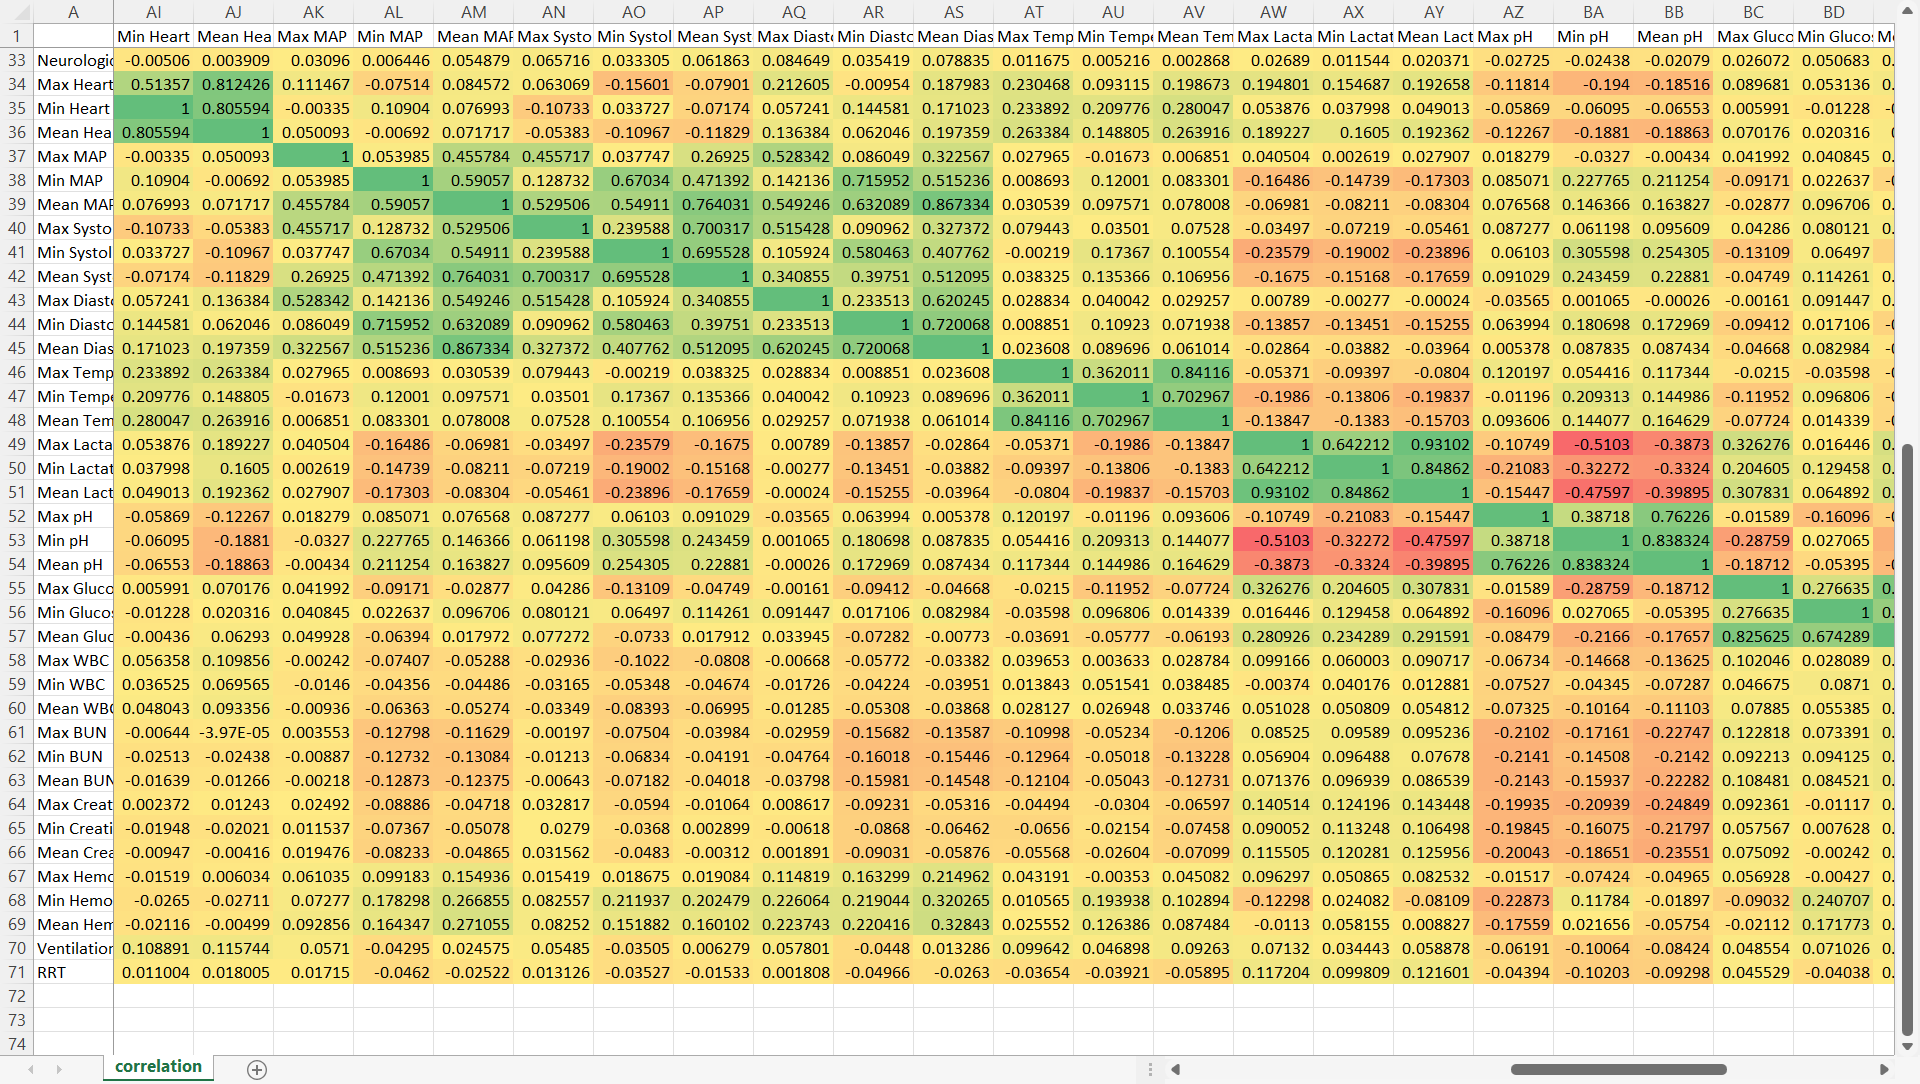

There are not much correlation between variables, the high correlation between mean-max-min of each laboratory should be ignored, some with high correlation is:  

- Max, Min, Mean of Creatine - Severe Renal Failure: 0.67
- Hematologic Dysfunction - Hematologic Disease: 0.82
- Metastasis - Malignancy: 0.62
- OASIS - SAPS II: 0.67
- SOFA - SAPS II: 0.68
- Max, Min, Mean of Creatine - Max, Min, Mean BUN: 0.67

## Missing value - Laboratory result

There are missing values in all Laboratory variables, however, we see that missing value happen to a whole test, for example number of missing value of Max Lactate = Min Lactate = Mean Lactate.  
We can assume that different patient will have different tests, and some test is not required for patient.   
Note that, there are **50 patients** without any laboratory result, we will remove those patients if the laboratory result important to predict the mortality of the patient.  
There are some way to impute the missing value:  
- Set 0 to missing values (as A deep learning solution to recommend laboratory reduction strategies in ICU https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10777357/#:~:text=The%20laboratory%20results%20for%20each,the%20missing%20values%20as%20zeros.)
- Using single regression imputation (SRI), multiple imputation (MI), and inverse probability weighted (IPW) method to fill the missing value (Dealing with missing data in laboratory test results used as a baseline covariate: results of multi-hospital cohort studies utilizing a database system contributing to MID-NET® in Japan https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-023-02345-7)
- XGBoost Regression to predict missing values (Predicting Missing Values in Medical Data Via XGBoost Regression https://europepmc.org/article/pmc/7709926)
- Using mean, mode to impute missing values. We assume this approach is not suitable because the laboratory result depend on each individual such as age, gender, medical history,... On this paper, they also mentioned that using mean to impute data could poorly affect to predict (The impact of imputation quality on machine learning classifiers for datasets with missing values https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10558448/)

In [41]:
# Count and percentage of missing values
data_statistics = pd.DataFrame(columns=['Variable', 'Missing Values', 'Percentage of Missing Values'])

for i in list_variable:
    missing_values = df[i].isnull().sum()
    percentage_missing_values = f'{df[i].isnull().sum()/df[i].count():.2%}'
    data_statistics.loc[len(data_statistics)] = [i, missing_values, percentage_missing_values]

print(data_statistics)

                    Variable  Missing Values Percentage of Missing Values
0                Max Lactate            5101                       37.01%
1                Min Lactate            5101                       37.01%
2               Mean Lactate            5101                       37.01%
3                     Max pH            1173                        6.62%
4                     Min pH            1173                        6.62%
5                    Mean pH            1173                        6.62%
6                Max Glucose              75                        0.40%
7                Min Glucose              75                        0.40%
8               Mean Glucose              75                        0.40%
9                    Max WBC             229                        1.23%
10                   Min WBC             229                        1.23%
11                  Mean WBC             229                        1.23%
12                   Max BUN          

In [55]:
# Check if there is any whole row with no laboratory results
lab_results = ['Max Lactate', 'Min Lactate',
                 'Mean Lactate', 'Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
                 'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
                 'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
                 'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
                 'Mean Hemoglobin']
df['No Lab Results'] = df[lab_results].isnull().all(axis=1)
print(df['No Lab Results'].value_counts())

No Lab Results
False    18833
True        50
Name: count, dtype: int64


## Outliers - Laboratory result


In [56]:
# Boxplot and histogram for data
def draw_box_hist(data):
    fig, ax =plt.subplots(1,2)
    fig.set_figwidth(15)
    sns.boxplot(x=data, ax=ax[0])
    sns.histplot(data, kde=True, ax=ax[1])
    plt.show()


# Extract outliers
def extract_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

Variable: Max Lactate
Count: 1084
Min: 7.5
Max: 32.0


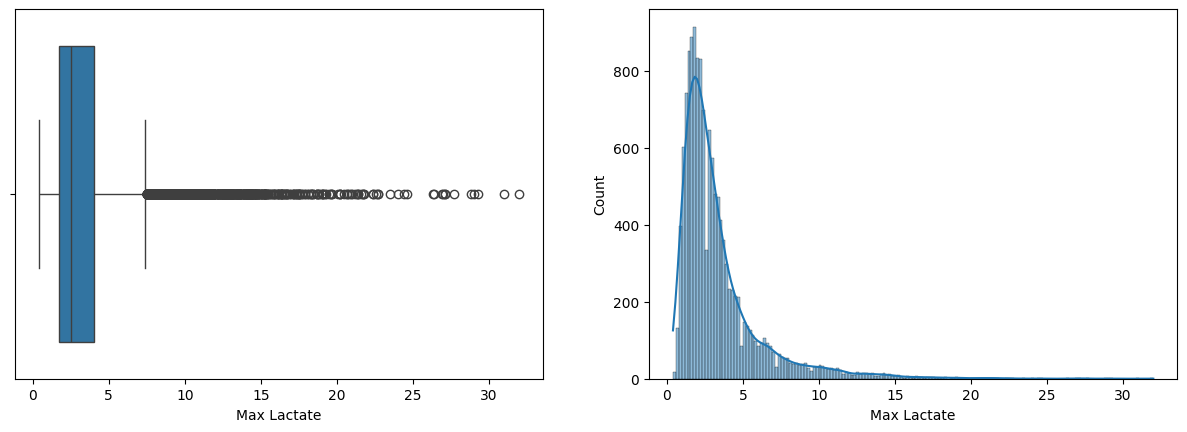

Variable: Min Lactate
Count: 901
Min: 3.8
Max: 24.2


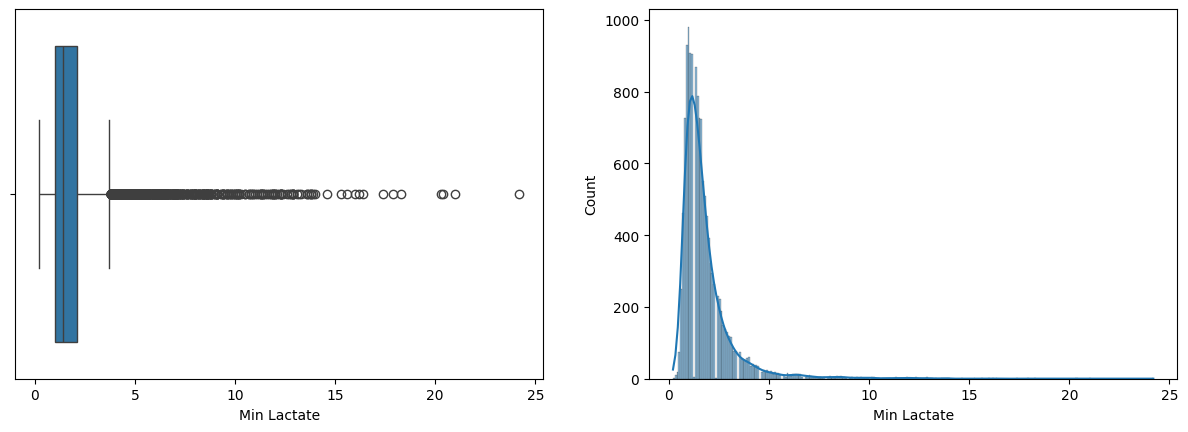

Variable: Mean Lactate
Count: 1047
Min: 5.16
Max: 25.54


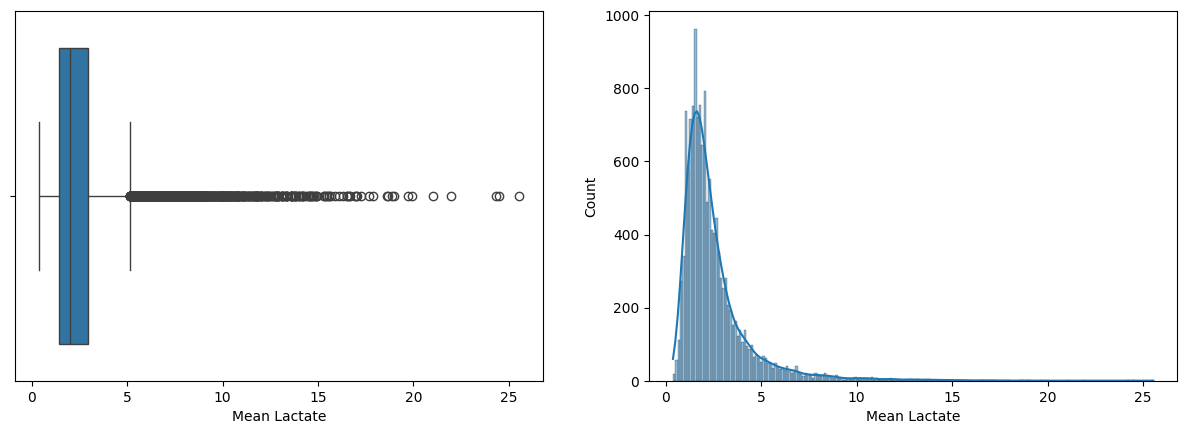

Variable: Max pH
Count: 515
Min: 6.72
Max: 7.89


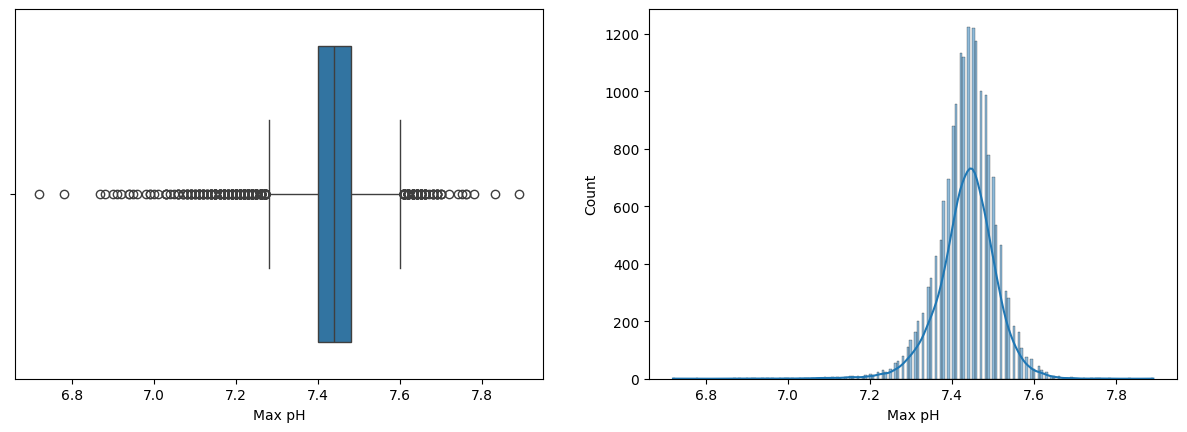

Variable: Min pH
Count: 769
Min: 6.37
Max: 7.63


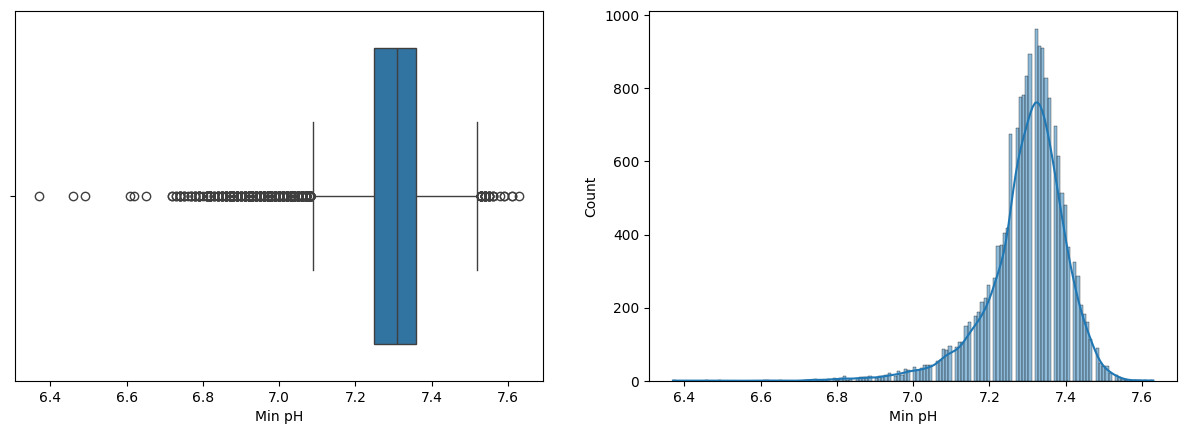

Variable: Mean pH
Count: 824
Min: 6.72
Max: 7.63


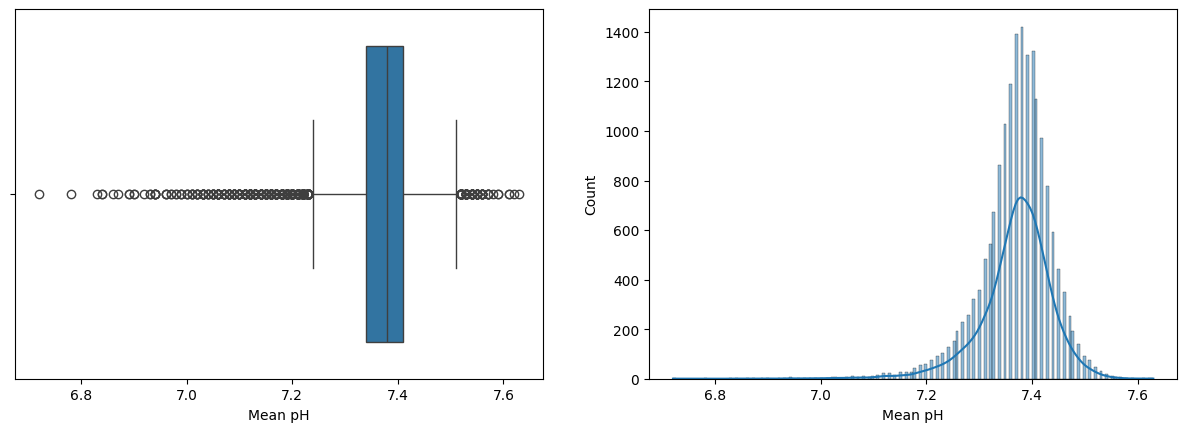

Variable: Max Glucose
Count: 1063
Min: 318.0
Max: 3070.0


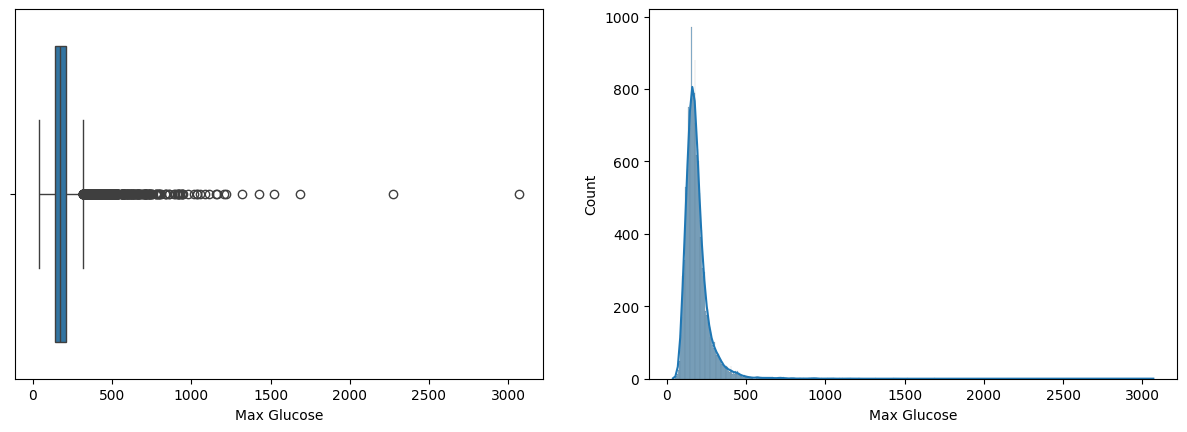

Variable: Min Glucose
Count: 1012
Min: 1.15
Max: 576.0


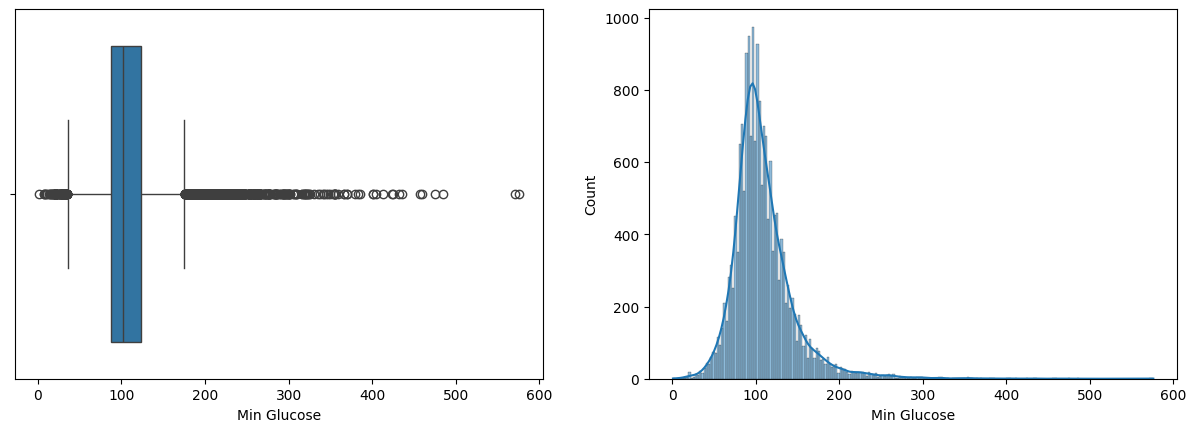

Variable: Mean Glucose
Count: 1177
Min: 21.33
Max: 745.09


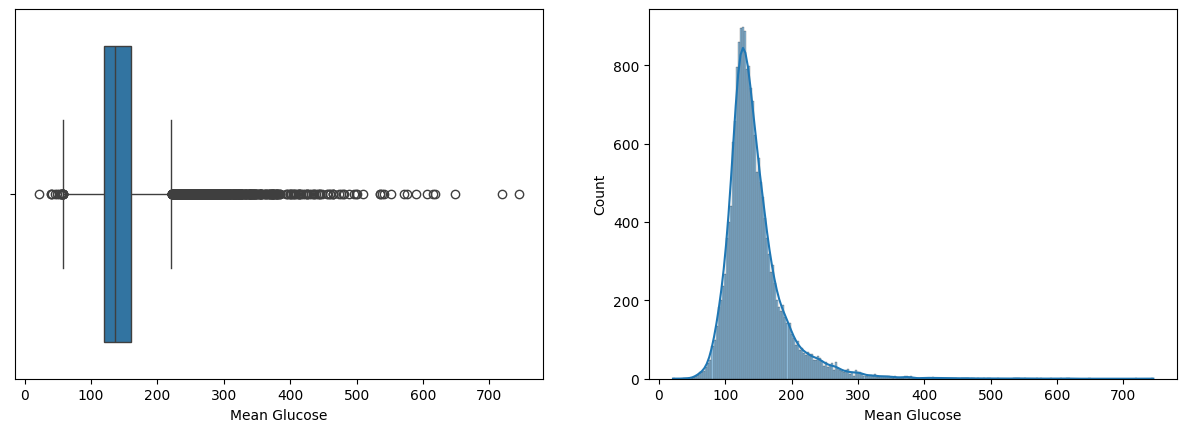

Variable: Max WBC
Count: 708
Min: 29.3
Max: 600.2


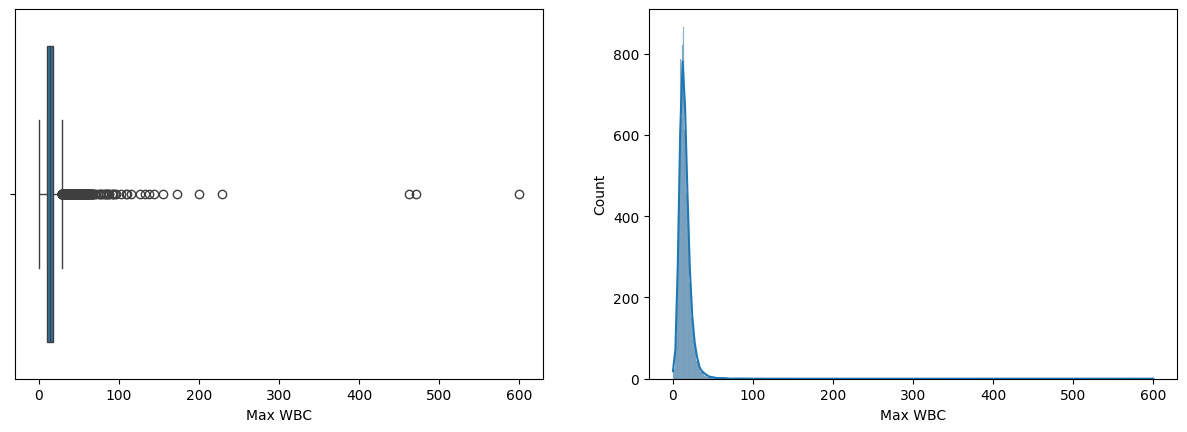

Variable: Min WBC
Count: 610
Min: 22.2
Max: 442.7


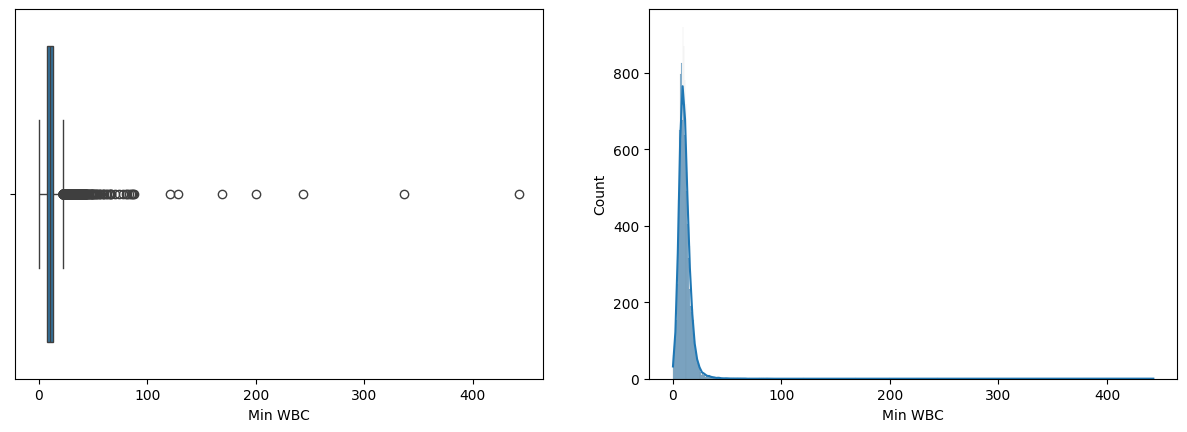

Variable: Mean WBC
Count: 635
Min: 24.9
Max: 521.45


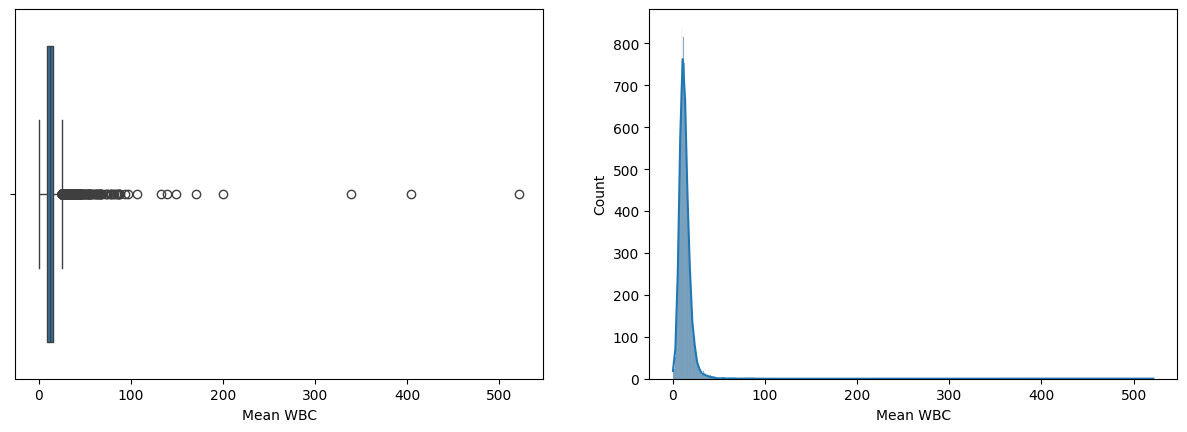

Variable: Max BUN
Count: 1681
Min: 50.0
Max: 251.0


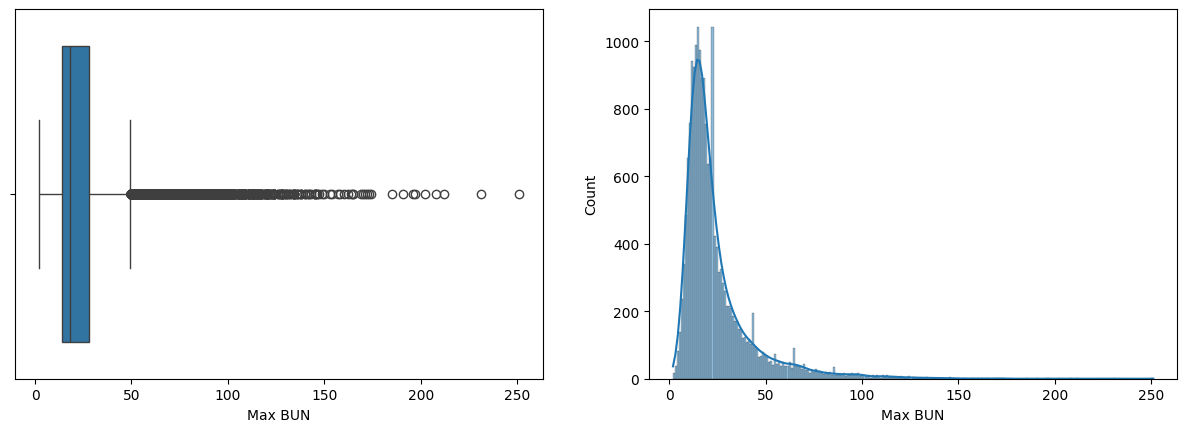

Variable: Min BUN
Count: 1708
Min: 42.0
Max: 196.0


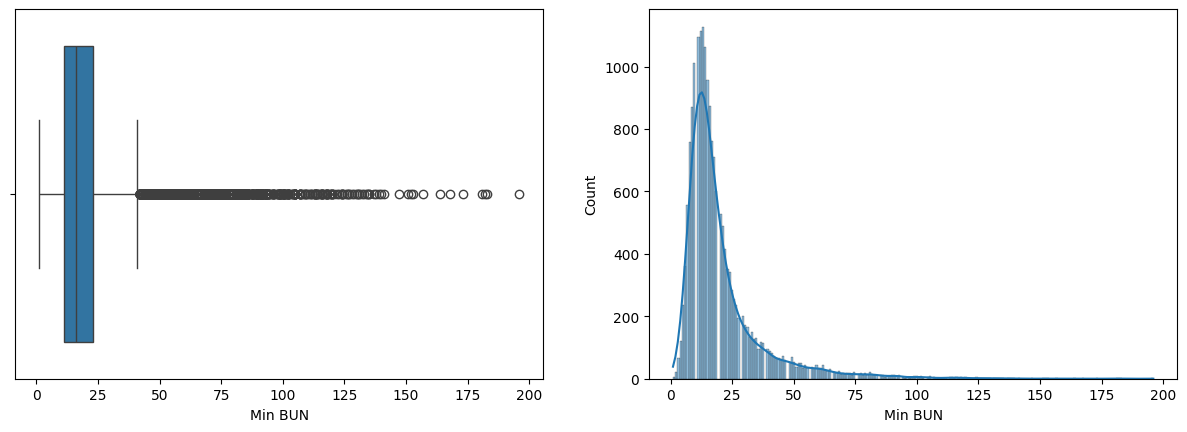

Variable: Mean BUN
Count: 1690
Min: 45.5
Max: 218.71


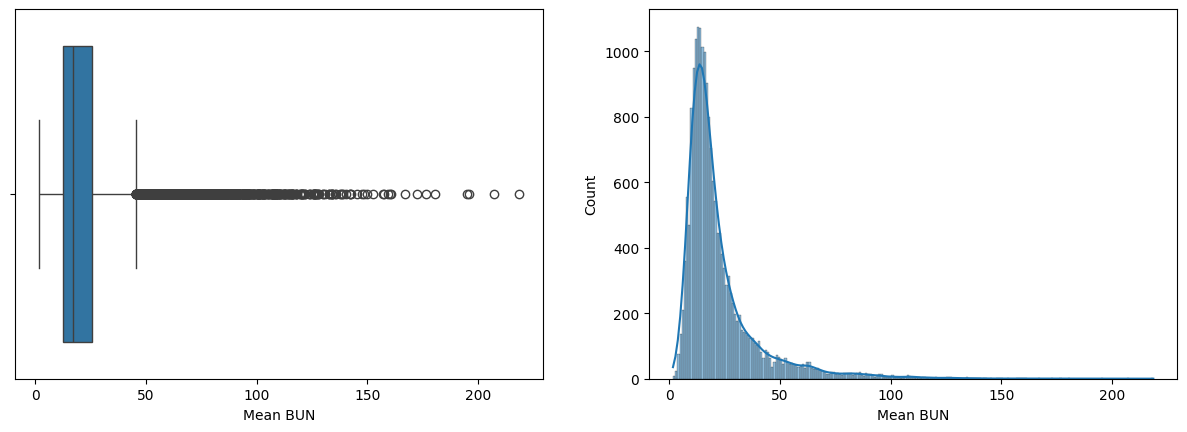

Variable: Max Creatinine
Count: 1853
Min: 2.4
Max: 23.5


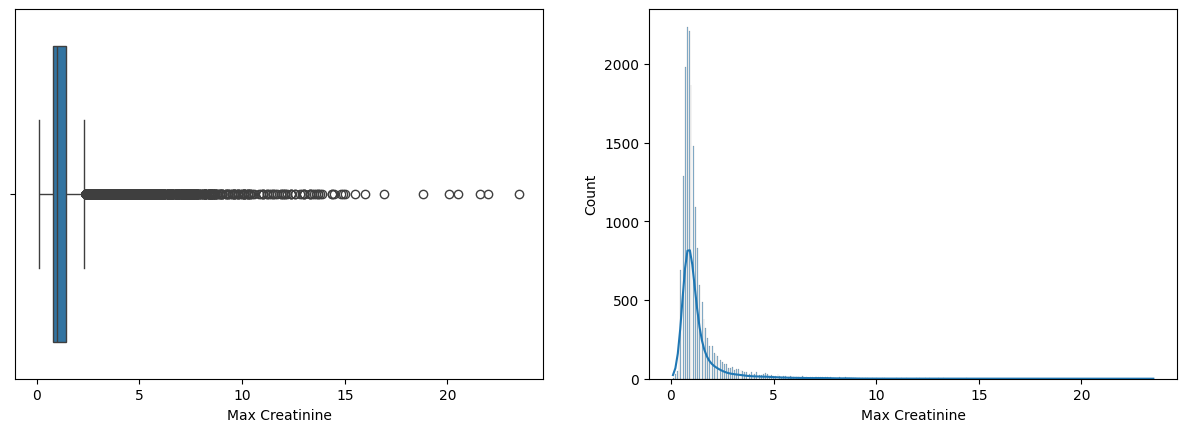

Variable: Min Creatinine
Count: 2030
Min: 1.8
Max: 21.9


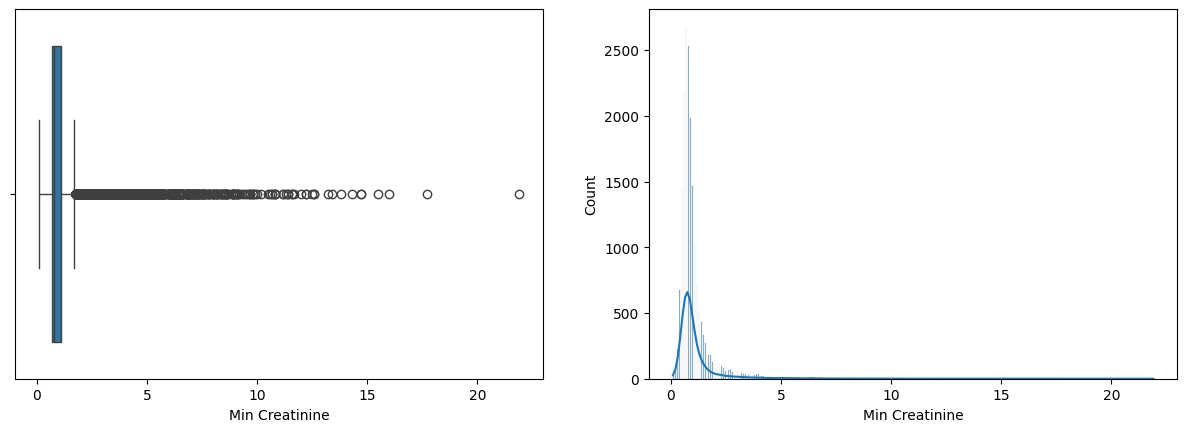

Variable: Mean Creatinine
Count: 1940
Min: 2.03
Max: 22.7


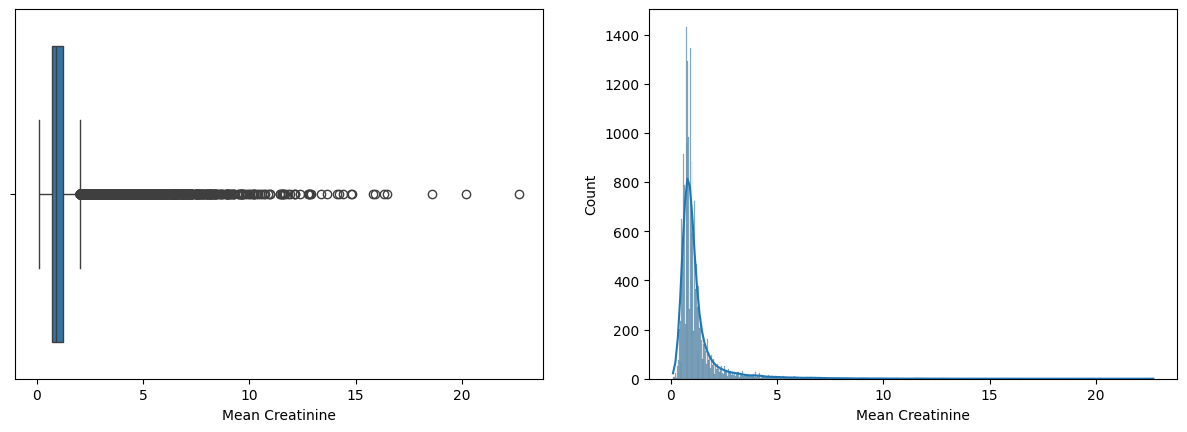

Variable: Max Hemoglobin
Count: 110
Min: 4.6
Max: 21.0


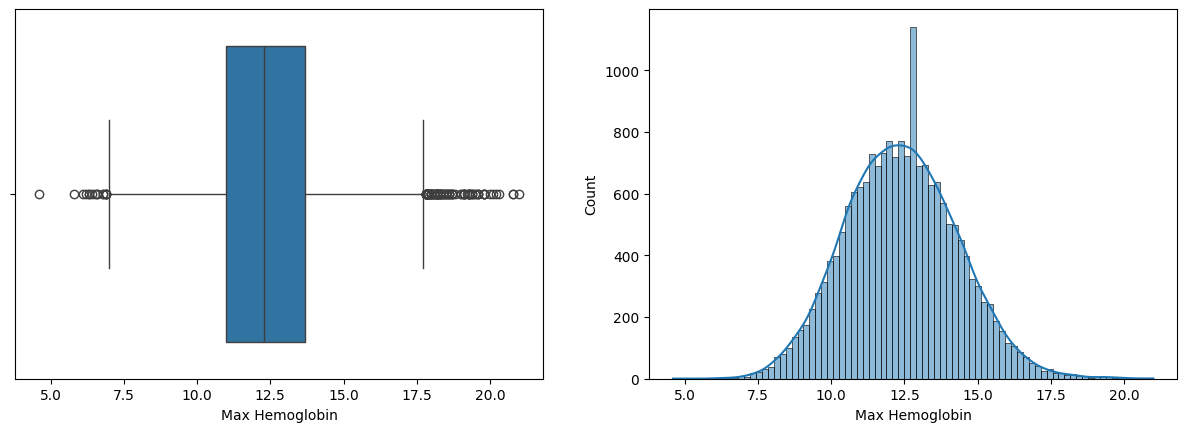

Variable: Min Hemoglobin
Count: 118
Min: 1.2
Max: 19.4


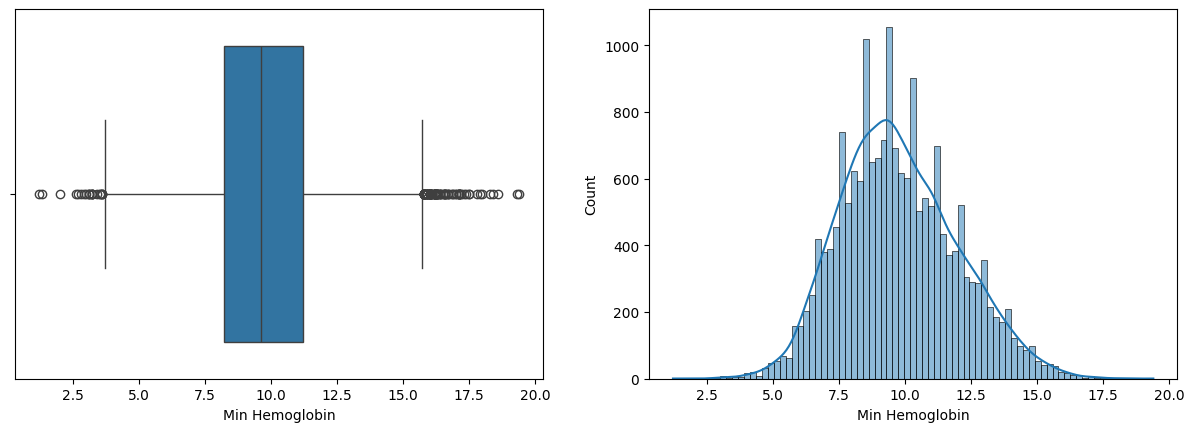

Variable: Mean Hemoglobin
Count: 192
Min: 4.0
Max: 19.6


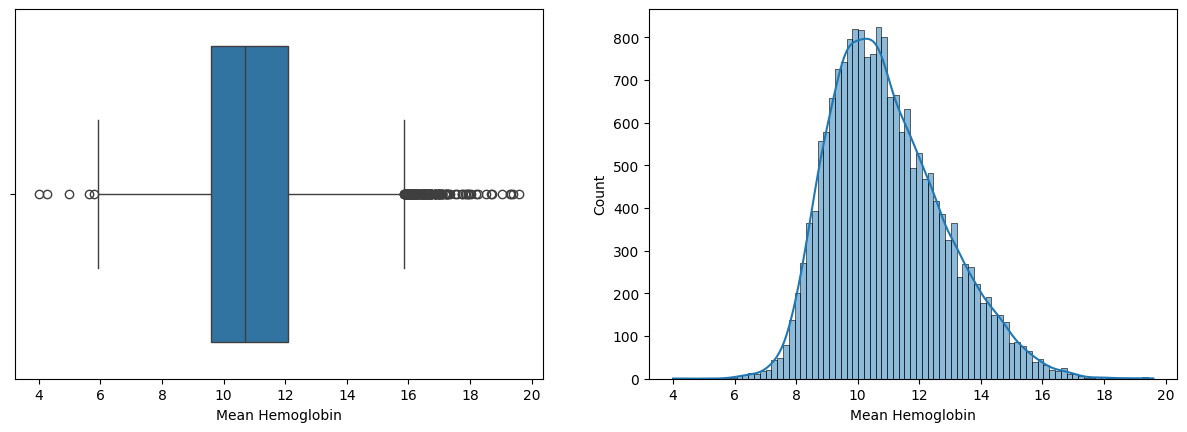

In [57]:
# Boxplot and scatter plot for each variable
for i in lab_results:
    outliers = extract_outliers(df[i])
    print(f'Variable: {i}')
    print(f'Count: {len(outliers)}')
    print(f'Min: {min(outliers)}')
    print(f'Max: {max(outliers)}')
    draw_box_hist(df[i])

Using boxplot to determine the outliers, we can see that all resuls have outliers in the Laboratory results.  
But there are some rare situation that we could consider to remove from the data set to avoid affect to the prediction:

1. Level Glucose in Blood
- The rare case that high Glucose in Blood is higher than 1687 mg/dl (acrording article Unusual high blood glucose in ketoacidosis as first presentation of type 1 diabetes mellitus (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6169544/))
- The rare low glucose in Blood is under 54 mg/dl,below this one patient could be pass out (https://www.cdc.gov/diabetes/basics/low-blood-sugar.html#:~:text=Severe%20low%20blood%20sugar%20is,managing%20their%20blood%20sugar%20closely.)
  
=> Therefore, we will remove the record having max, mean, min above 1700 and below 50 on Glucose level

2.  White blood cells (WBC)
   - If the WBC higher than 100, that could be fatal to life (https://www.ncbi.nlm.nih.gov/books/NBK560882/#:~:text=Hyperleukocytosis%20is%20defined%20as%20a,treatment%20of%20the%20underlying%20disorder.)

=> Therefore, we will remove the record having max, mean, min above 100 on White Blood Cell


Using boxplot to determine the outliers, we can see that all resuls have outliers in the Laboratory results.  
But there are some rare situation that we could consider to remove from the data set to avoid affect to the prediction:
  
We will consider any record with 10 times higher and 10 lower than normal condition is the outliers and remove it from the dataset (we compare the max, mean, min).  
  
| Variable            | Normal value         | Remove condition | Reference                                                                                                                |
|---------------------|----------------------|------------------|--------------------------------------------------------------------------------------------------------------------------|
| Lactate             | 0 -> 2 (mmol/L)      | > 20 (mmol/L)    | https://www.ncbi.nlm.nih.gov/books/NBK470202/#:~:text=Normal%20lactate%20levels%20are%20less,4%20mmol%2FL%20or%20higher. |
| pH                  | 7.35 -> 7.45         | 6.615 -> 8.195   | https://www.medicalnewstoday.com/articles/ph-of-blood#symptoms-of-changes                                                |
| Glucose             | 50->99 (mg/dL)       | > 1000 (mg/dL)   | https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test                                               |
| White Blood Cell    | 4.5 -> 11.0 (10^9/L) | > 110 (10^9/L)   | https://www.mountsinai.org/health-library/tests/wbc-count                                                                |
| Blood Urea Nitrogen | 5   -> 20 (mg/dL)    | > 200 (mg/dL)    | https://www.ncbi.nlm.nih.gov/books/NBK305                                                                                |
| Creatinine          | Variety on invidual  | -                |                                                                                                                          |
| Hemoglobin          | Variety on invidual  | -                |                                                                                                                          |

In [3]:
# Remove outliers

# Remove records with lactate > 20
df = df[df['Max Lactate'] <= 20]
df = df[df['Min Lactate'] <= 20]
df = df[df['Mean Lactate'] <= 20]

# Remove records with pH < 6.615 and pH > 8.195
df = df[df['Max pH'] >= 6.615]
df = df[df['Max pH'] <= 8.195]
df = df[df['Min pH'] >= 6.615]
df = df[df['Min pH'] <= 8.195]
df = df[df['Mean pH'] >= 6.615]
df = df[df['Mean pH'] <= 8.195]

# Remove records with glucose > 1000
df = df[df['Max Glucose'] <= 1000]
df = df[df['Min Glucose'] <= 1000]
df = df[df['Mean Glucose'] <= 1000]

# Remove records with WBC > 110
df = df[df['Max WBC'] <= 110]
df = df[df['Min WBC'] <= 110]
df = df[df['Mean WBC'] <= 110]

# Remove records with BUN > 200
df = df[df['Max BUN'] <= 200]
df = df[df['Min BUN'] <= 200]
df = df[df['Mean BUN'] <= 200]

df.shape

(13395, 70)

With that condition, we removed 5488 records

## Univariate data distribution


In [34]:
# Histogram and QQ plot for data
def draw_QQ_hist(data):
    fig, ax =plt.subplots(1,2)
    fig.set_figwidth(15)
    sns.histplot(data, kde=True, ax=ax[0])
    ax[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(data.mean(), color='b', linestyle='dashed', linewidth=2)
    ax[0].axvline(data.mode()[0], color='g', linestyle='dashed', linewidth=2)

    qqplot(data, line='s', ax=ax[1])
    ax[1].set_title('QQ plot')
    fig.suptitle(data.name)
    plt.show()

# Check normality of data
def check_normality(data):
    # Because the sample size > 5000, we use Kolmogorov-Smirnov test
    kstest(data, 'norm')
    print(kstest(data, 'norm'))
    if kstest(data, 'norm')[1] > 0.05:
        print('Normally distributed')
    else:
        print('Not normally distributed')
    


### Level Glucose in blood

The level of Glucose in blood is **no normal distribution** based on histogram, QQ plot and the Ktest.  
We can see that the Mean of Glucose of patient is higher than 100 mg/dL, we can see that patients who take ICU admission tend to have **higher level of Glucose than normal people**. In other way, they are pre diabetes

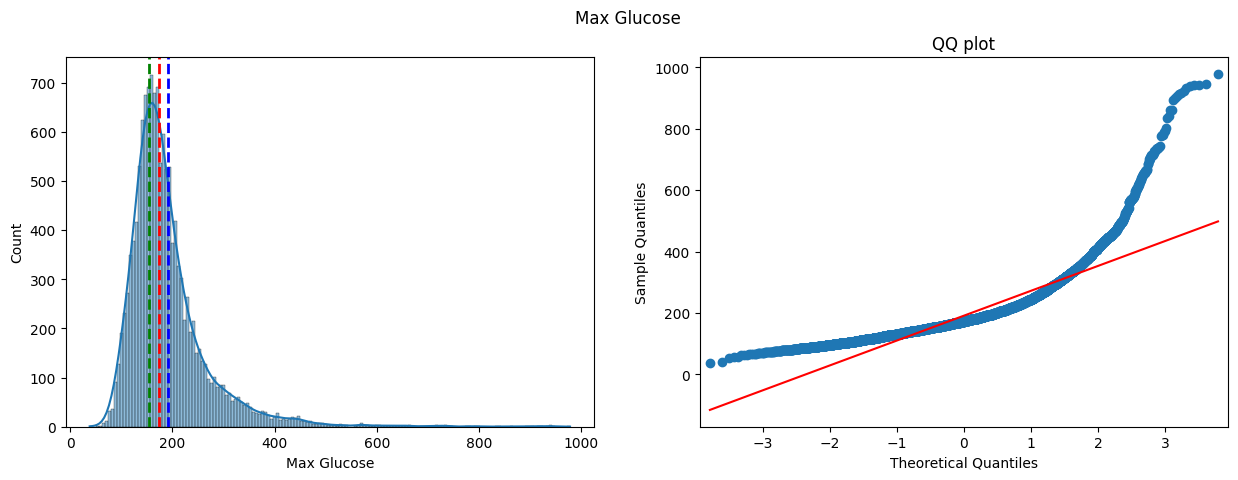

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=38.0, statistic_sign=-1)
Not normally distributed


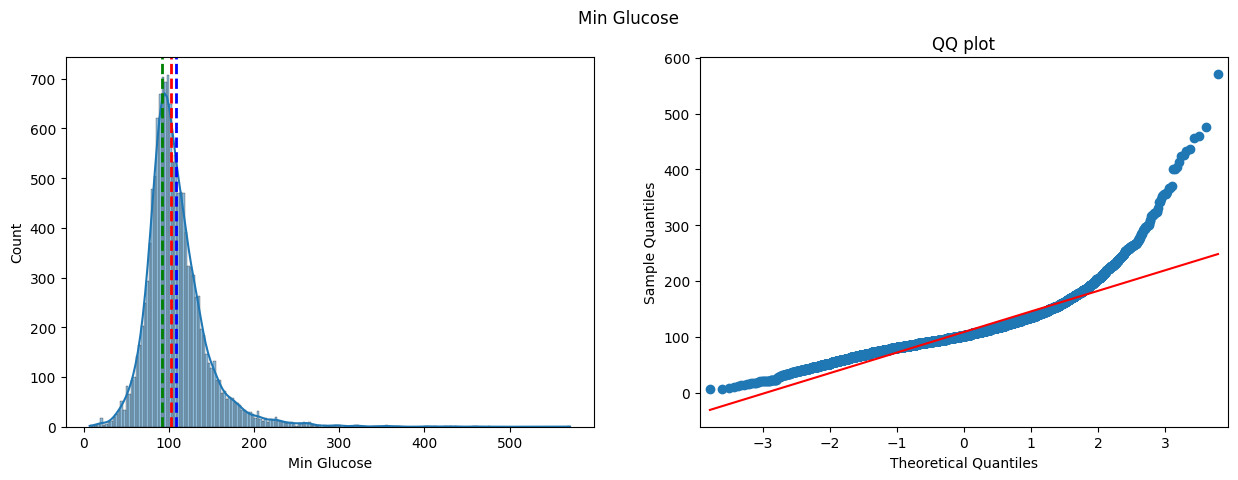

KstestResult(statistic=0.9999999999987201, pvalue=0.0, statistic_location=7.0, statistic_sign=-1)
Not normally distributed


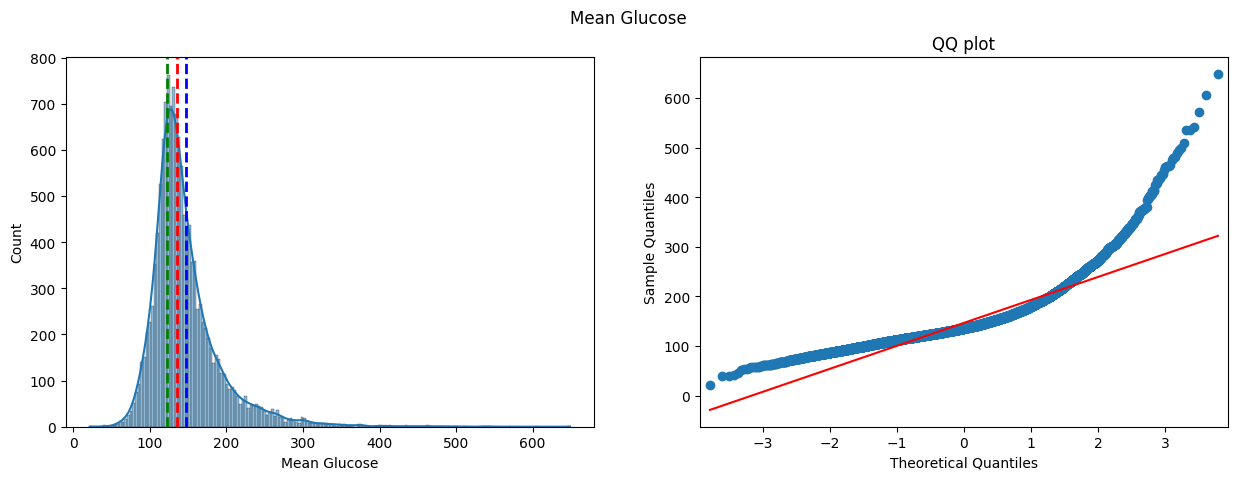

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=21.33, statistic_sign=-1)
Not normally distributed


In [35]:
glucose = df['Max Glucose'], df['Min Glucose'], df['Mean Glucose']
for i in glucose:
    draw_QQ_hist(i)
    check_normality(i)

### Lactate

Based on the graphs and test, there are **no normal distribution** in the Lactate result.  
We also found that the mean of Lactate test of patient which is 2.57mmol/L is **higher than normal person** (less than 2mmol/L)

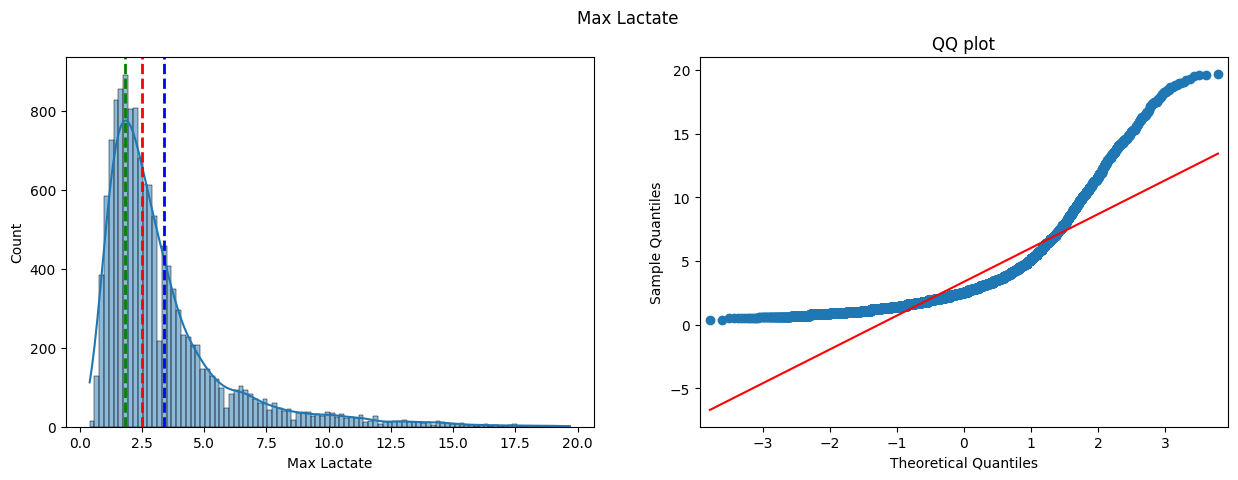

KstestResult(statistic=0.8030424123645542, pvalue=0.0, statistic_location=1.1, statistic_sign=-1)
Not normally distributed


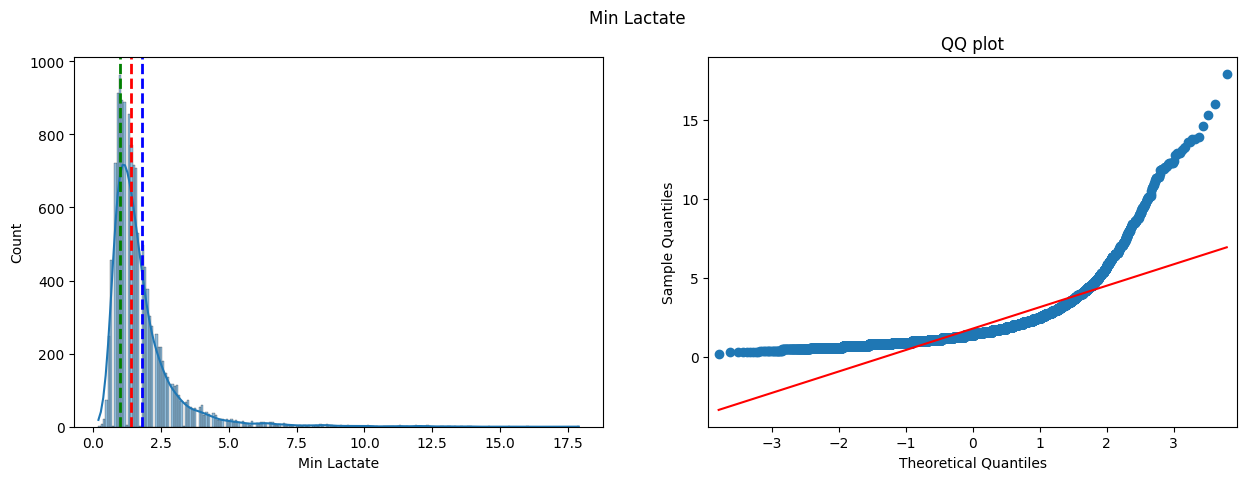

KstestResult(statistic=0.7319818498299319, pvalue=0.0, statistic_location=0.7, statistic_sign=-1)
Not normally distributed


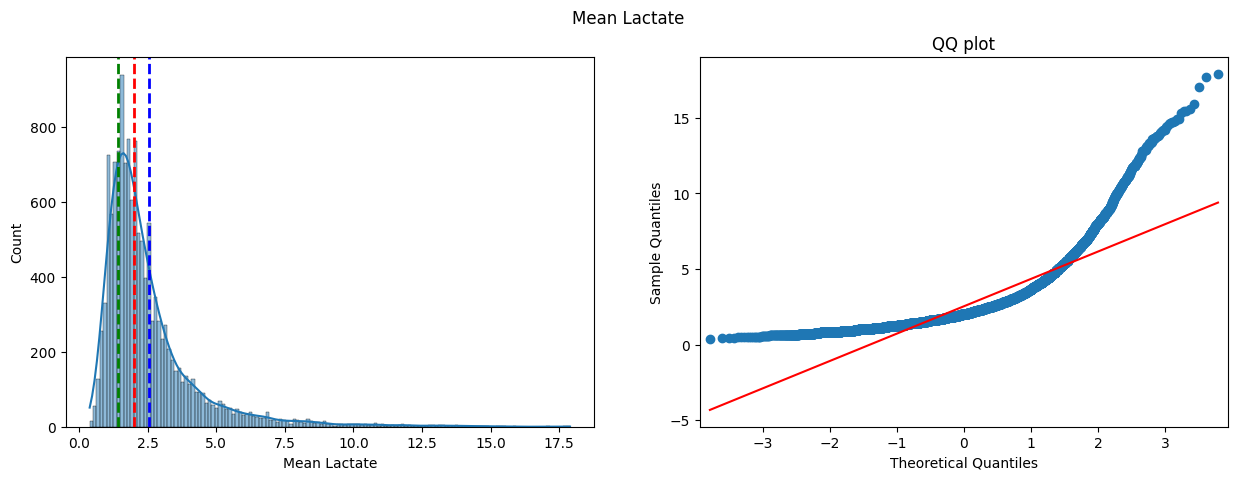

KstestResult(statistic=0.7831140629778375, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)
Not normally distributed


In [36]:
lactate = df['Max Lactate'], df['Min Lactate'], df['Mean Lactate']
for i in glucose:
    draw_QQ_hist(i)
    check_normality(i)

### pH

Based on the graphs and test, there are **no normal distribution** in the pH result.  
We also found that the mean of pH test of patient which is 7.30 is **lower end of the normal range** (between 7.35 -> 7.45)

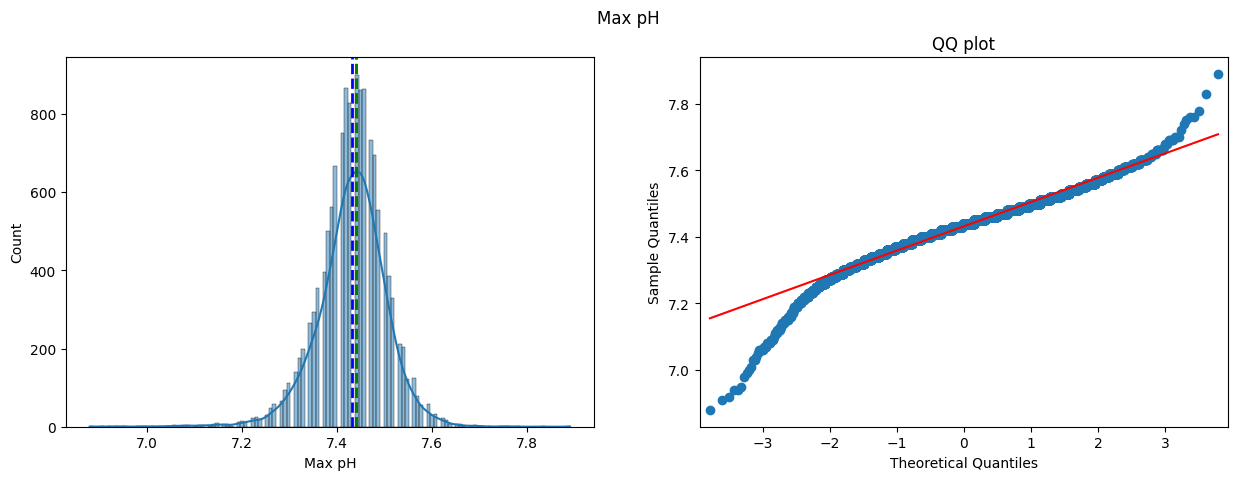

KstestResult(statistic=0.9999999999970074, pvalue=0.0, statistic_location=6.88, statistic_sign=-1)
Not normally distributed


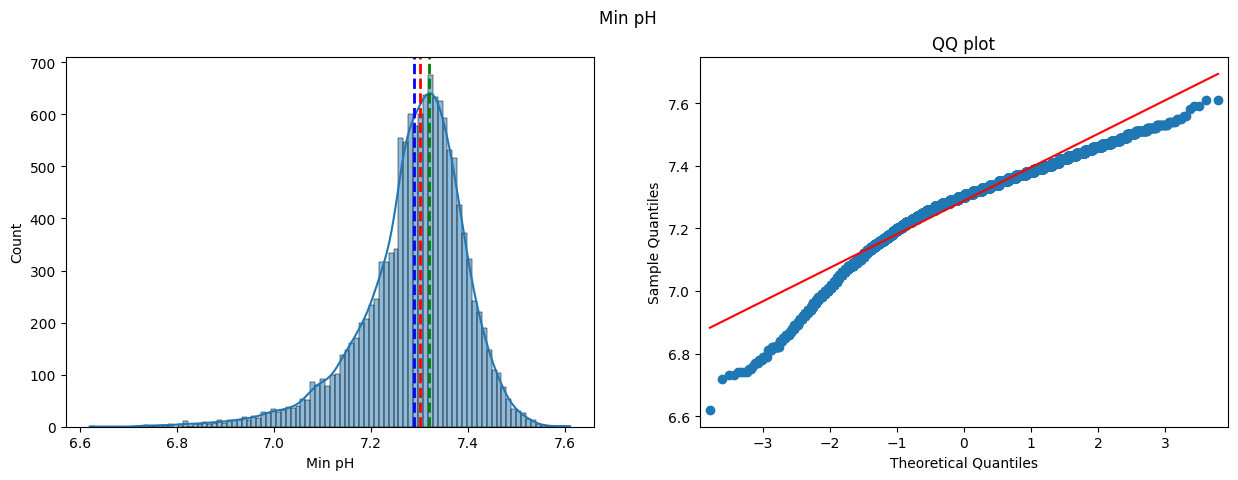

KstestResult(statistic=0.99999999998204, pvalue=0.0, statistic_location=6.62, statistic_sign=-1)
Not normally distributed


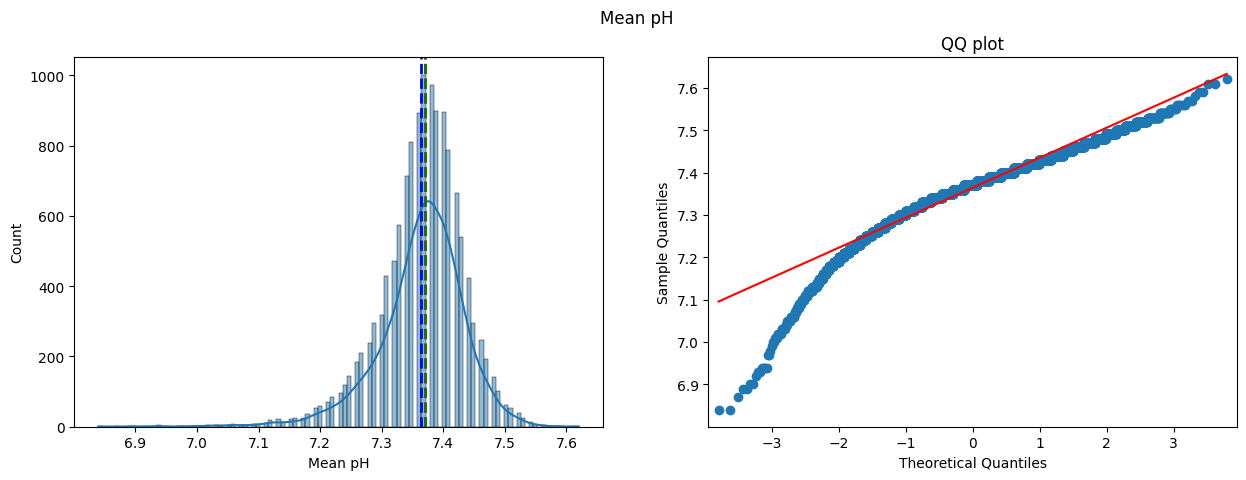

KstestResult(statistic=0.9999999999960404, pvalue=0.0, statistic_location=6.84, statistic_sign=-1)
Not normally distributed


In [37]:
ph = df['Max pH'], df['Min pH'], df['Mean pH']
for i in glucose:
    draw_QQ_hist(i)
    check_normality(i)

### Number of White Blood Cell

Based on the graphs and test, there are **no normal distribution** in the number of White Blood Cell.  
We also found that the mean of White Blood Cell test of patient which is 12.95 x10^9 L is **higher than normal person** (between 4.5 to 11)

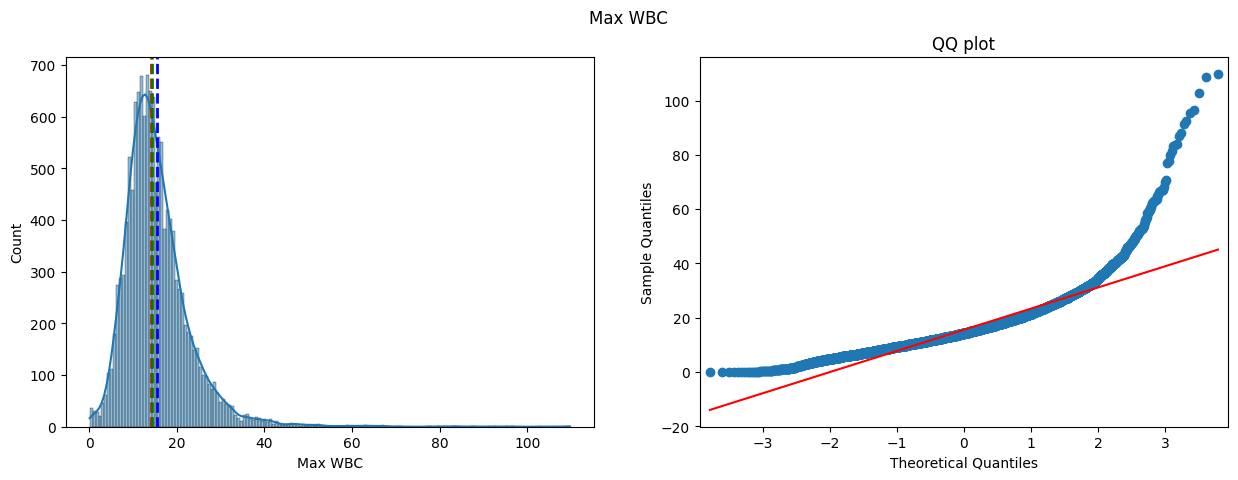

KstestResult(statistic=0.9891009653483654, pvalue=0.0, statistic_location=2.9, statistic_sign=-1)
Not normally distributed


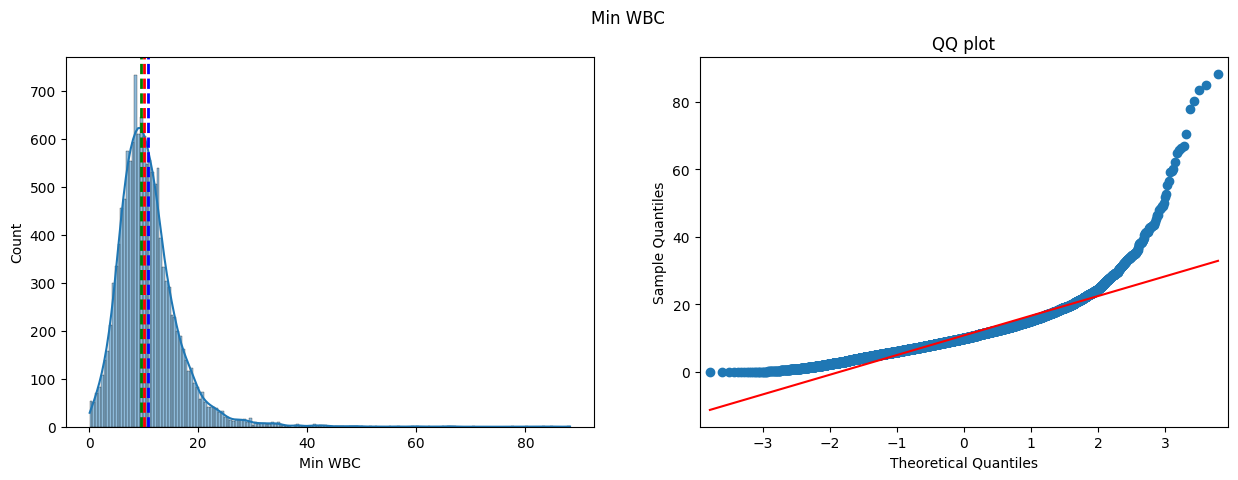

KstestResult(statistic=0.9701801706922201, pvalue=0.0, statistic_location=2.6, statistic_sign=-1)
Not normally distributed


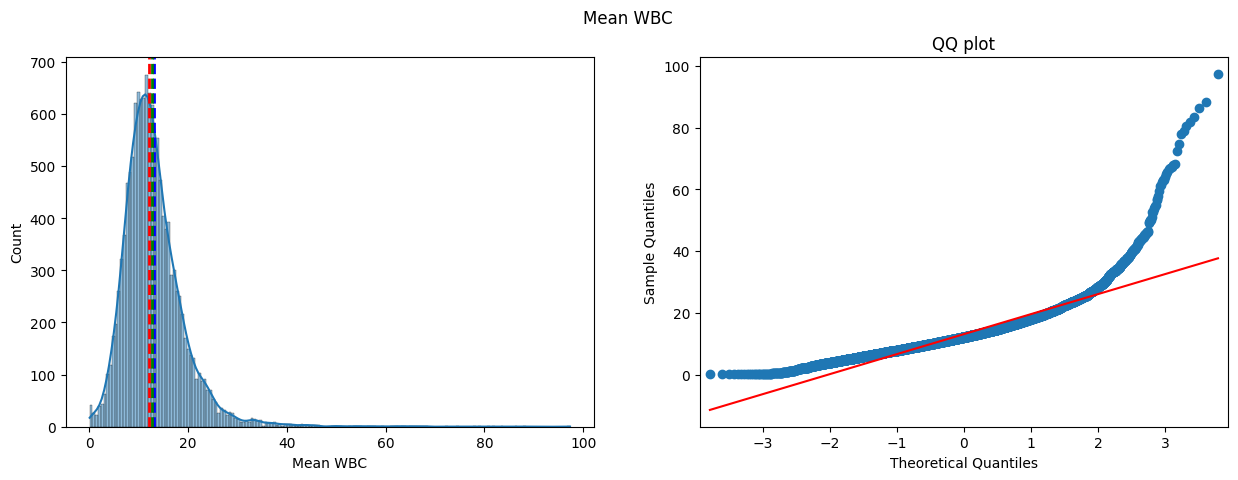

KstestResult(statistic=0.9855234095906267, pvalue=0.0, statistic_location=2.75, statistic_sign=-1)
Not normally distributed


In [38]:
wbc = df['Max WBC'], df['Min WBC'], df['Mean WBC']
for i in wbc:
    draw_QQ_hist(i)
    check_normality(i)

### Number of Blood Urea Nitrogen

Based on the graphs and test, there are **no normal distribution** in the Blood Urea Nitrogen result.  
We also found that the mean of BUN test of patient which is 22.71 mg/dL is **higher than normal person** (between 5 to 20 mg/dL)

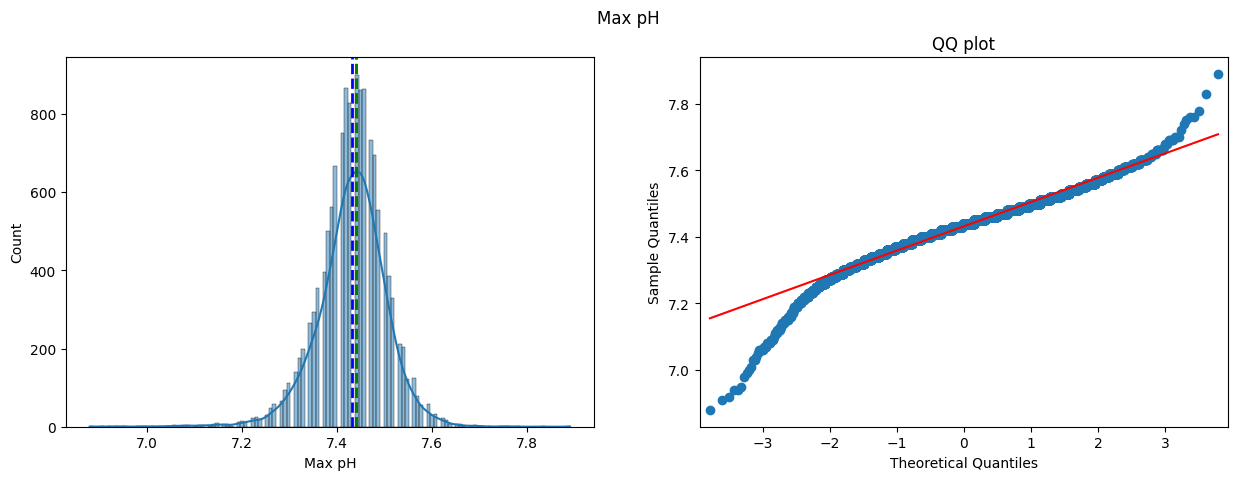

KstestResult(statistic=0.9999999999970074, pvalue=0.0, statistic_location=6.88, statistic_sign=-1)
Not normally distributed


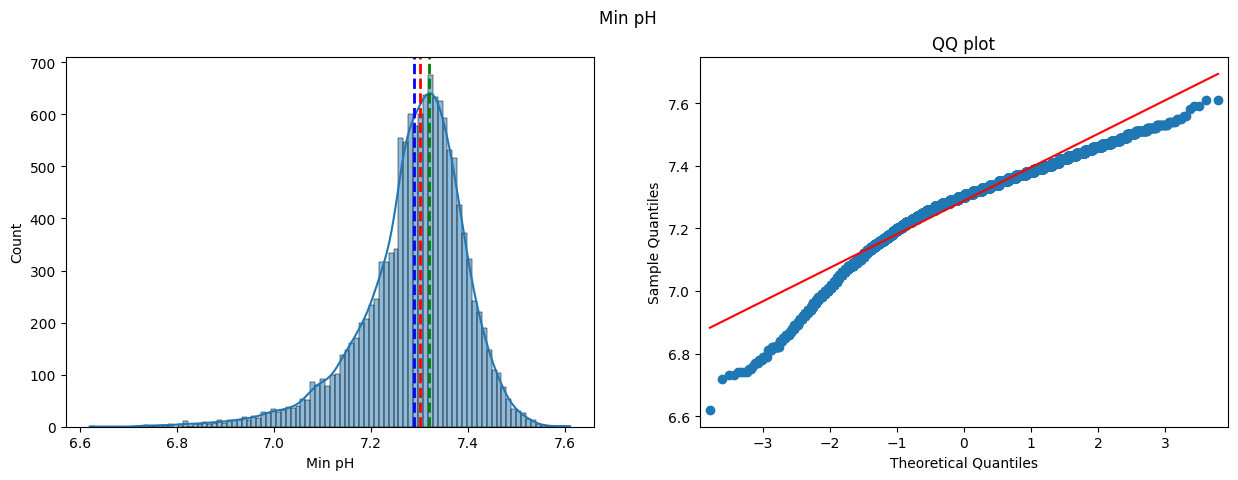

KstestResult(statistic=0.99999999998204, pvalue=0.0, statistic_location=6.62, statistic_sign=-1)
Not normally distributed


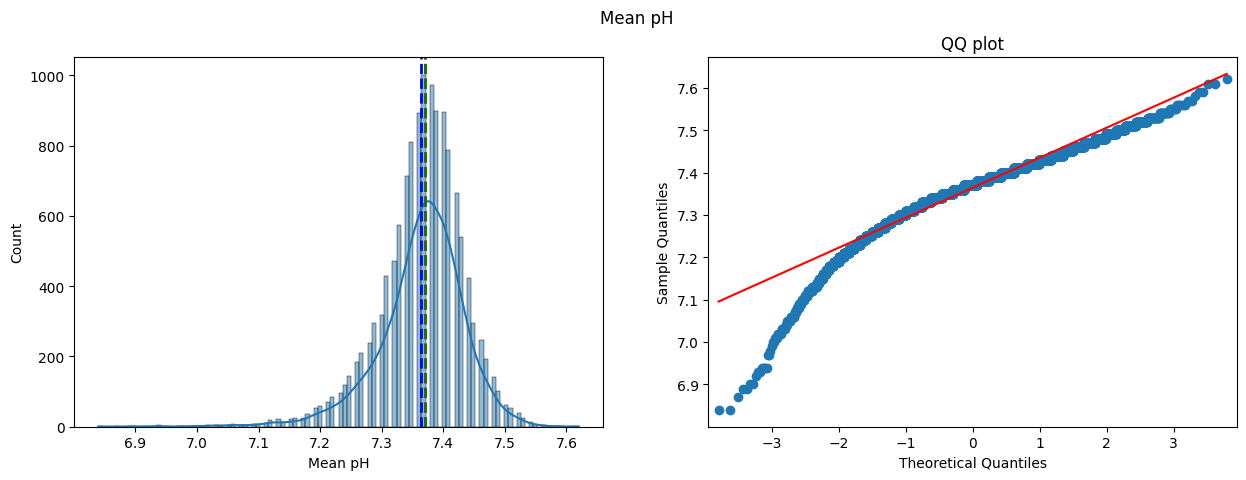

KstestResult(statistic=0.9999999999960404, pvalue=0.0, statistic_location=6.84, statistic_sign=-1)
Not normally distributed


In [39]:
bun = df['Max BUN'], df['Min BUN'], df['Mean BUN']
for i in glucose:
    draw_QQ_hist(i)
    check_normality(i)

### Creatinine

Based on the graphs and test, there are **no normal distribution** in the Creatine result.  
Although there are no specific Creatinine of normal range but we can see the histogram has the right skewed, we can assume that patient tend to have higher Creatinine level when they need to take ICU admission

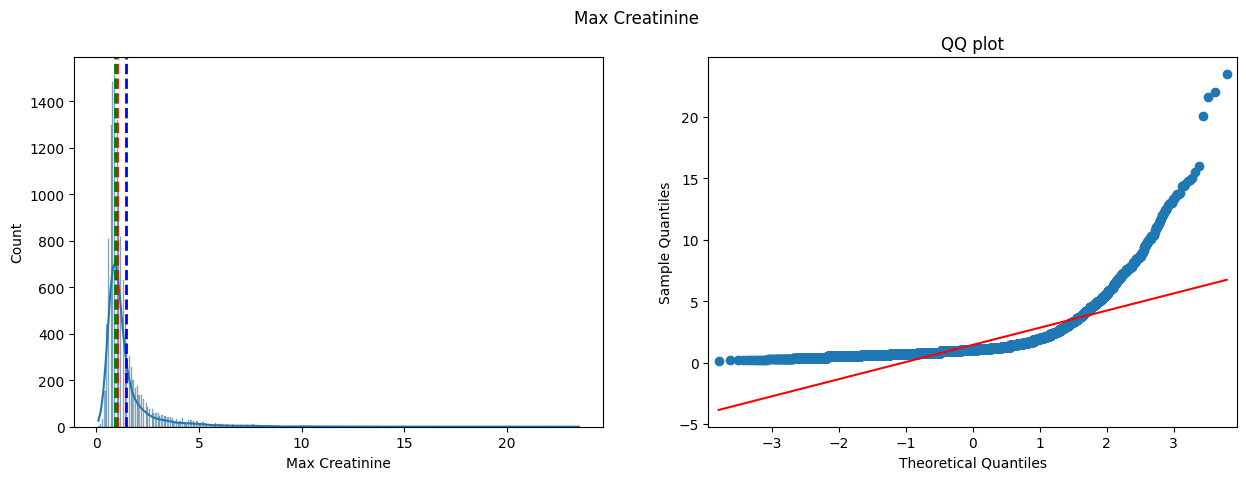

KstestResult(statistic=0.6778932055048723, pvalue=0.0, statistic_location=0.6, statistic_sign=-1)
Not normally distributed


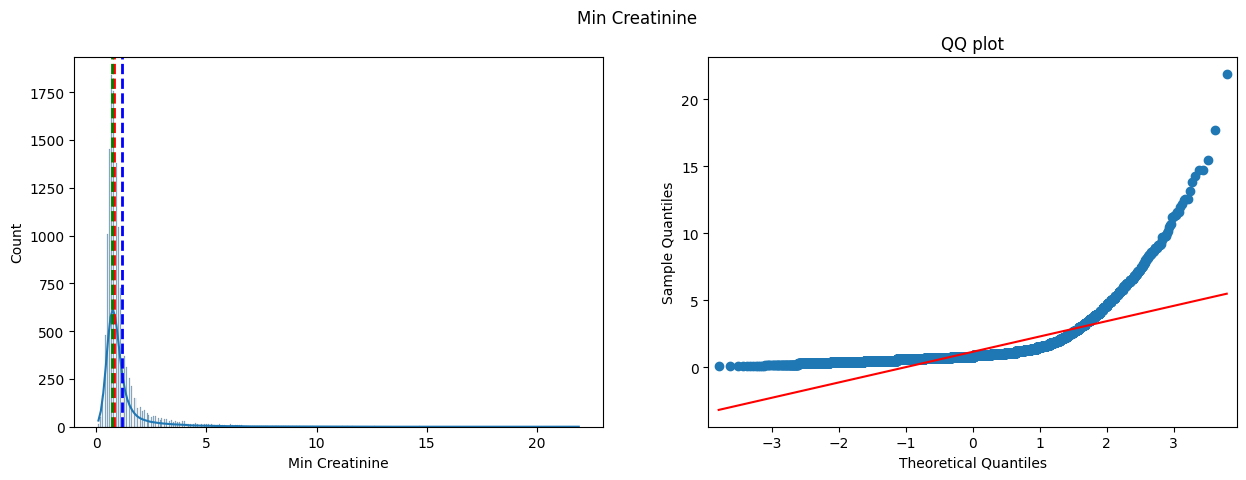

KstestResult(statistic=0.6388308823266446, pvalue=0.0, statistic_location=0.5, statistic_sign=-1)
Not normally distributed


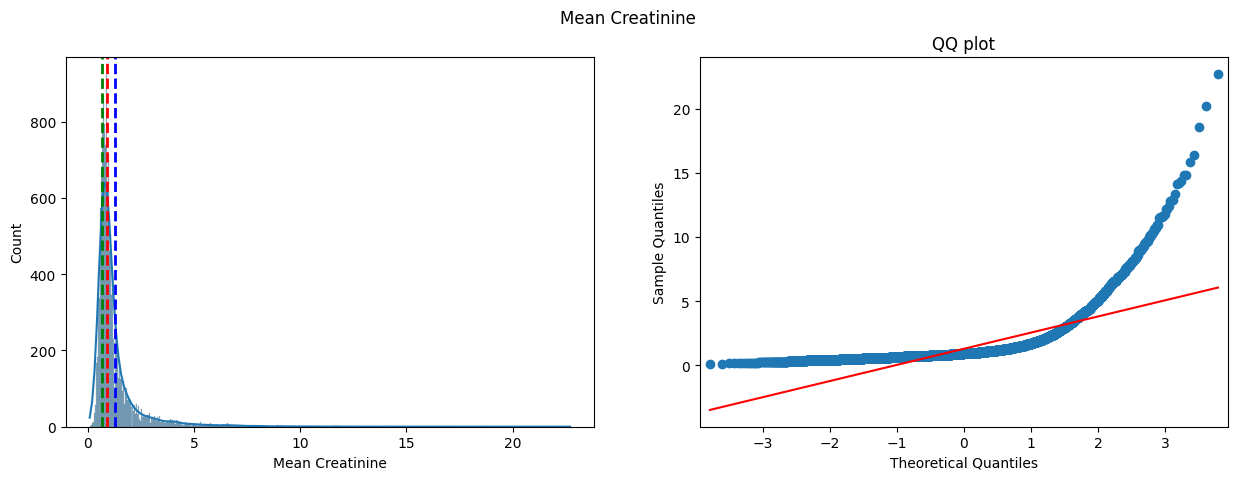

KstestResult(statistic=0.6558521589223893, pvalue=0.0, statistic_location=0.5, statistic_sign=-1)
Not normally distributed


In [40]:
creatinine = df['Max Creatinine'], df['Min Creatinine'], df['Mean Creatinine']
for i in creatinine:
    draw_QQ_hist(i)
    check_normality(i)

### Hemoglobin

Although the Ktest return no distribution in the Hemoglobin, but look at the histogram and QQ plot, we can see that there are normal distribution.

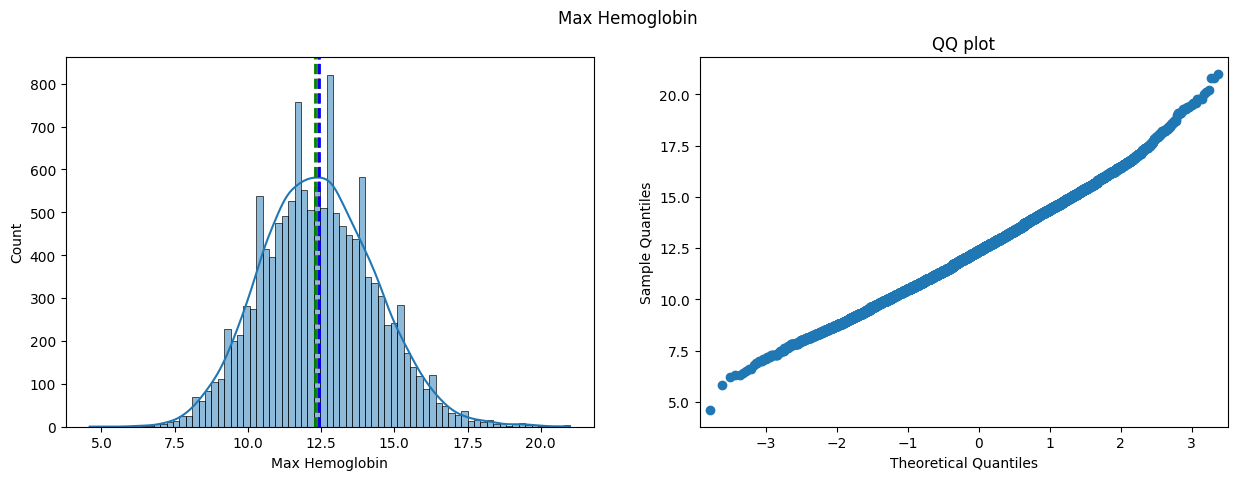

KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
Not normally distributed


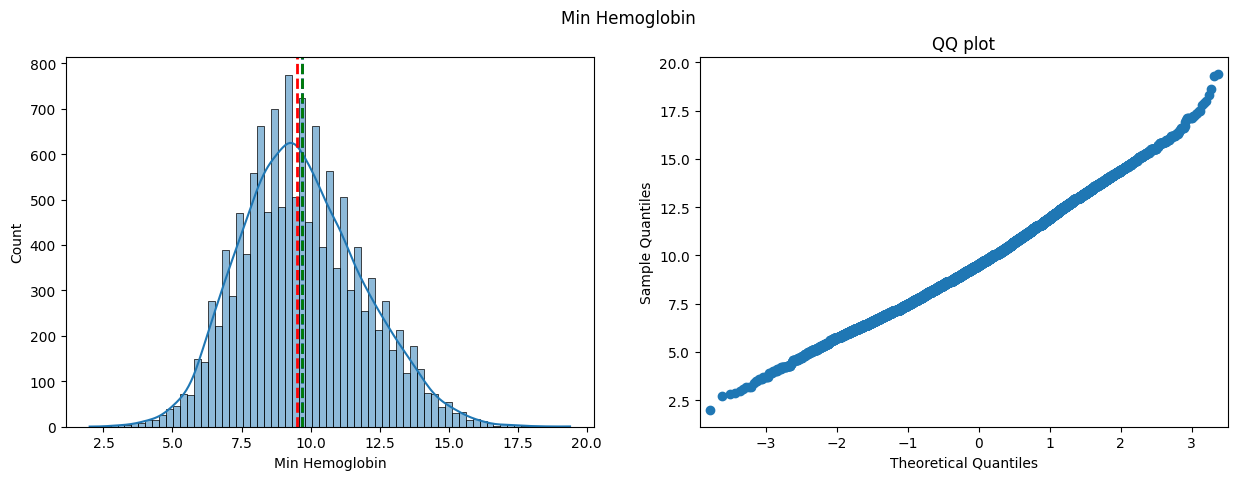

KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
Not normally distributed


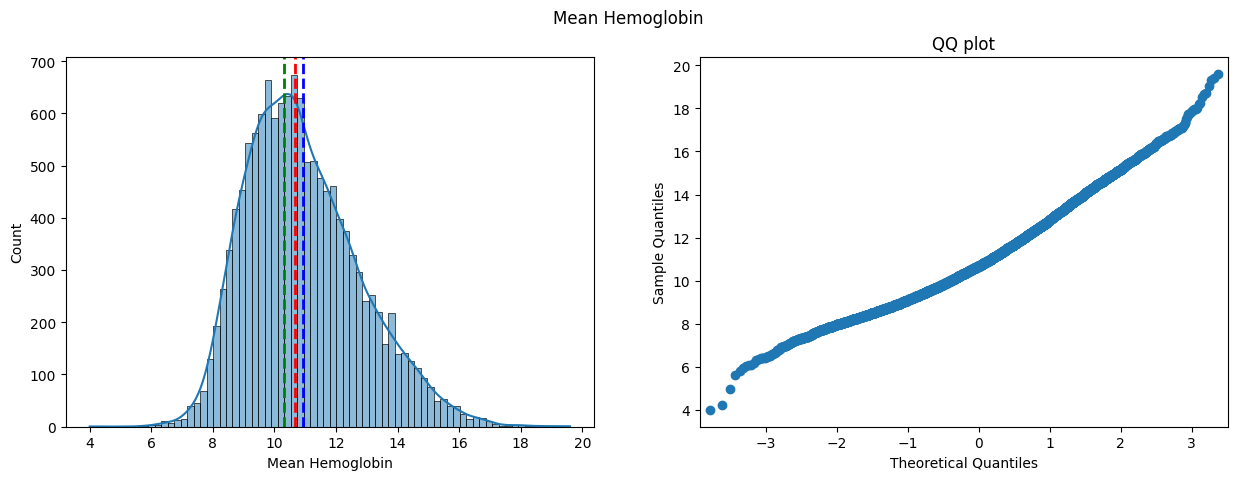

KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
Not normally distributed


In [42]:
hemoglobin = df['Max Hemoglobin'], df['Min Hemoglobin'], df['Mean Hemoglobin']
for i in hemoglobin:
    draw_QQ_hist(i)
    check_normality(i)

## Standardize data


## Conclusion
People with ICU admission tend to have:
- Higher Lactate
- Lower pH
- Higher White Blood Cell
- Higher Blood Ucrea Nitrogen
- Higher Creatinine
- Higher Hemoglobin  
Than normal person
